# Hamoye Data Science Internship Quiz Solution

### Details of the dataset used was discussed at the end of the analysis

In [1]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
sn.set_style('whitegrid')

%matplotlib inline

In [38]:
# read the fuel data csv file
fuel_df = pd.read_csv('fuel_ferc1.csv')

In [39]:
# observe the first few rows of the fuel data
fuel_df.head()

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
0,f1_fuel_1994_12_1_0_7,1,1994,rockport,coal,ton,5377489.0,16.590,18.59,18.53,1.121
1,f1_fuel_1994_12_1_0_10,1,1994,rockport total plant,coal,ton,10486945.0,16.592,18.58,18.53,1.120
2,f1_fuel_1994_12_2_0_1,2,1994,gorgas,coal,ton,2978683.0,24.130,39.72,38.12,1.650
3,f1_fuel_1994_12_2_0_7,2,1994,barry,coal,ton,3739484.0,23.950,47.21,45.99,1.970
4,f1_fuel_1994_12_2_0_10,2,1994,chickasaw,gas,mcf,40533.0,1.000,2.77,2.77,2.570


In [63]:
# Let me rename some of the columns to a more descriptive name
fuel_df.rename(columns = {'fuel_type_code_pudl': 'fuel_type', 
                          'plant_name_ferc1': 'plant_name',
                          'utility_id_ferc1':'utility_id'}, inplace=True)

In [52]:
# skewness of the fuel quantity burned
skew = fuel_df.fuel_qty_burned.skew()
print(f'The skewness of the fuel quantity burned is {skew:.2f}')

The skewness of the fuel quantity burned is 15.85


In [53]:
# kurtosis of the fuel quantity burned
kurt = fuel_df.fuel_qty_burned.kurtosis()
print(f'The skewness of the fuel quantity burned is {kurt:.2f}')

The skewness of the fuel quantity burned is 651.37


In [98]:
# fuel type with the lowest average fuel cost per unit burned
fuel_df.groupby('fuel_type').agg({'fuel_cost_per_unit_burned': 'mean'})

,fuel_cost_per_unit_burned
fuel_type,
coal,67.421830
gas,13.659397
nuclear,4955.157002
oil,168.877086
other,18.253856
waste,19.518122


> From the results above, **gas** has the lowest average fuel cost per unit burned.

In [66]:
# How coal cost per unit burned has increased or decreased from 1994 through 1998
coal_df = fuel_df.query('fuel_type == "coal" & 
                        (report_year == 1994 | report_year == 1998)')

In [85]:
# return the sum of cost per unit burned for coal in 1994 and 1998
coal_cost = coal_df.groupby(['report_year', 'fuel_type'])[
    'fuel_cost_per_unit_burned'].sum()
coal_cost

report_year  fuel_type
1994         coal         14984.572
1998         coal         11902.597
Name: fuel_cost_per_unit_burned, dtype: float64

In [90]:
#calculate the percentage decrease
percent_de = (coal_cost[1] - coal_cost[0])/coal_cost[0] * 100
print(f'The cost per unit burned of coal decreased from 1994 through 1998 by {percent_de:.0f}%')

The cost per unit burned of coal decreased from 1994 through 1998 by -21%


In [53]:
# Check for total missing values under each column
df.isna().sum()

record_id                         0
utility_id_ferc1                  0
report_year                       0
plant_name_ferc1                  0
fuel_type_code_pudl               0
fuel_unit                       180
fuel_qty_burned                   0
fuel_mmbtu_per_unit               0
fuel_cost_per_unit_burned         0
fuel_cost_per_unit_delivered      0
fuel_cost_per_mmbtu               0
dtype: int64

In [101]:
# find the percentage of missing rows
miss_rows = 180/fuel_df.shape[0]*100
print(f'The percentage rows that are missing in the fuel unit column is {miss_rows:.3f}%')

The percentage rows that are missing in the fuel unit column is 0.610%


> **It was quite painful that I missed this option of converting to percentage during the quiz.**

In [114]:
# calculate the standard deviation and 75 percentile of fuel mmbtu per unit
fuel_mmbtu = fuel_df.fuel_mmbtu_per_unit
std = np.std(fuel_mmbtu)
percent_75 = np.percentile(a = fuel_mmbtu, q = 75)
print(f'The standard deviation and 75 percentile of fuel\
 mmbtu per unit are{std: .2f} and{percent_75: .2f}')

The standard deviation and 75 percentile of fuel mmbtu per unit are 10.60 and 17.01


In [152]:
# Which year has the highest average fuel_cost_per_unit_delivered
year_gp = fuel_df.groupby('report_year').agg({'fuel_cost_per_unit_delivered':'mean'}).reset_index()
max_year = np.max(year_gp.fuel_cost_per_unit_delivered)
year_gp[year_gp['fuel_cost_per_unit_delivered'] == max_year]

,report_year,fuel_cost_per_unit_delivered
3,1997,11140.197239


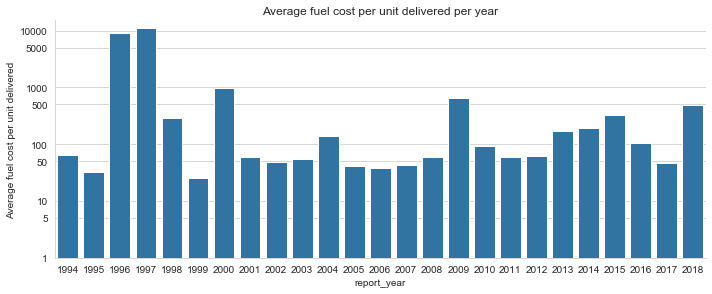

In [163]:
# Let's visualize the average fuel cost per unit delivered per year
color = sn.color_palette()[0]
sn.catplot(data = fuel_df, x = 'report_year', y = 'fuel_cost_per_unit_delivered',ci = None, 
           kind="bar", height=4, aspect=2.5, color = color)
plt.title('Average fuel cost per unit delivered per year')
plt.ylabel('Average fuel cost per unit delivered')

# creating a more understandable labels for the y-axis 
# rather than the scientific notation 
locy = [1, 5, 10, 50, 100, 500, 1000, 5000, 10000]
ylabel = ['{}'.format(x) for x in locy]

plt.yscale('log')
plt.yticks(locy, ylabel);

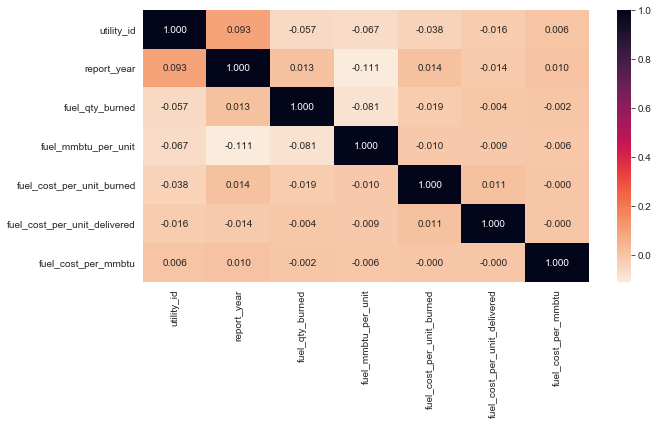

In [118]:
#correlation between the numerical features of the dataset
plt.figure(figsize=[10,5])
sn.heatmap(fuel_df.corr(), cmap= 'rocket_r', annot=True, fmt = '.3f');

### Dataset Description
The data provided in this [Github link](https://raw.githubusercontent.com/WalePhenomenon/climate_change/master/fuel_ferc1.csv) is the fuel quality data from the Federal Energy Regulatory Commission **(FERC)** which is provided by the United States Energy Information Administration. The data consists of the following columns:

`Record_id` : record id

`Utility_id_ferc1`: Utility id assigned by the FERC

`Report_year`: year of report

`Plant_name_ferc1`: the name of the plant

`Fuel_type_code_pudl`: the type of fuel

`Fuel_unit`: the unit of fuel

`Fuel_qty_burned`: the quantity of fuel burned

`Fuel_mmbtu_per_unit`: the measure of energy per unit

`fuel_cost_per_unit_burned`: the fuel cost per unit burned

`Fuel_cost_per_unit_delivered`: the cost of fuel delivered per unit

`fuel_cost_per_mmbtu`: the cost of fuel per mmbtu

In [164]:
#generate html of this notebook
from subprocess import call
call(['python', '-m', 'nbconvert', 'Hamoye_part_1.ipynb'])

0